In [9]:
import numpy as np 
from scipy.stats import moment
import matplotlib.pyplot as plt 

In [10]:
def foo(data, theta):
    return (1 - data) ** (1 / (1 - theta))

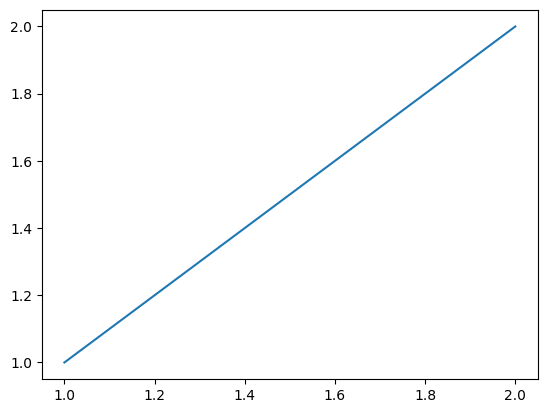

In [11]:
N = 100
theta = 3
alpha = 0.05

data = [foo(data, theta) for data in np.random.sample(N)]
data.sort()
data = np.linspace(1, 2, 100)
plt.plot(data, data)
plt.show()

In [12]:
theta_est = N / np.sum(np.log(data)) + 1
print(f"ОМП: theta estimate = {theta_est:.3f}")

right = (1.96 * np.log(2) * (2 ** (1 / (theta_est - 1)))) / (theta_est - 1) / 10 + 2 ** (1 / (theta_est -1))
left = (-(1.96 * np.log(2) * (2 ** (1 / (theta_est - 1)))) / (theta_est - 1) / 10 + 2 ** (1 / (theta_est -1)))

print(f"Доверительный размах для медианы: [{left:.3f}, {right:.3f}]")
print(f"Размах для медианы: {right - left:.3f}")

ОМП: theta estimate = 3.591
Доверительный размах для медианы: [1.238, 1.375]
Размах для медианы: 0.137


In [13]:
left0 = -1.96 * (theta_est - 1) / np.sqrt(N) + theta_est
right0 = 1.96 * (theta_est - 1) / np.sqrt(N) + theta_est

print(f"Асимптотический доверительный интервал: [{left0:.3f}, {right0:.3f}]")
print(f"Размах: {right0 - left0:.3f}")

Асимптотический доверительный интервал: [3.083, 4.099]
Размах: 1.016


In [14]:
def bar(data, N):
    return 1 + N / sum([np.log(data) for data in data])


M = np.sort(np.array([bar([foo(data, theta) for data in np.random.sample(N)], N) for i in range(50000)]))

left2 = M[int(alpha / 2 * 50000)]
right2 = M[int((1 - alpha / 2) * 50000)]

print(f"Бутстраповский параметрический интервал: [{left2:.3f}, {right2:.3f}]")
print(f"Размах: {right2 - left2:.3f}")

Бутстраповский параметрический интервал: [2.663, 3.458]
Размах: 0.795


In [15]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(data, size = len(data))))) + 1 - theta_est)

M = np.sort(M)

left3 = theta_est + M[74]
right3 = theta_est + M[974]

print(f"Бутрстраповский непараметрический интервал: [{left3:.3f}, {right3:.3f}]")
print(f"Размах: {right3 - left3:.3f}")

Бутрстраповский непараметрический интервал: [3.406, 3.906]
Размах: 0.500


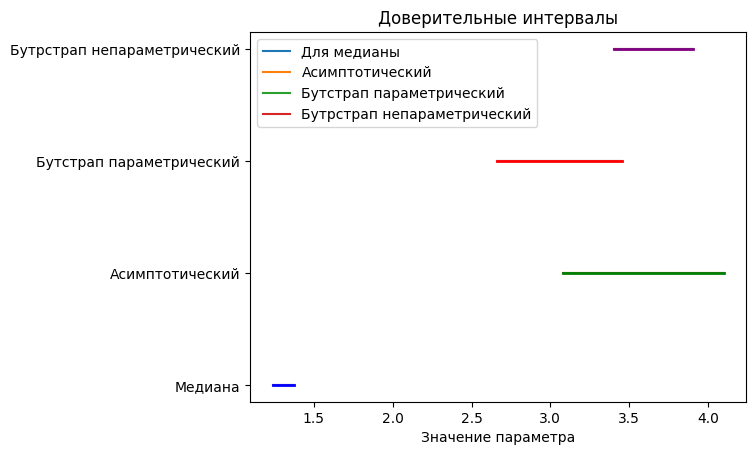

In [16]:

x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

x4 = np.linspace(left3, right3, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутрстрап непараметрический"])

x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

x4 = np.linspace(left3, right3, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.plot(x1, y1, label="Точный", color="blue", linewidth=2)
plt.plot(x2, y2, label="Асимптотический", color="green", linewidth=2)
plt.plot(x3, y3, label="Бутстрап", color="red", linewidth=2)
plt.plot(x4, y4, label="Бутрстрап непараметрический", color="purple", linewidth=2)



plt.yticks([1, 2, 3, 4], ["Медиана", "Асимптотический", "Бутстрап параметрический", "Бутрстрап непараметрический"])
plt.xlabel("Значение параметра")
plt.title("Доверительные интервалы")

plt.show()
